## Part A: Subreddit Prediction ##

In [0]:
subreddit_train = "coursework_subreddit_train.json"
subreddit_test = "coursework_subreddit_test.json"

!gsutil cp gs://textasdata/coursework/coursework_subreddit_train.json $subreddit_train 
!gsutil cp gs://textasdata/coursework/coursework_subreddit_test.json  $subreddit_test

Copying gs://textasdata/coursework/coursework_subreddit_train.json...
- [1 files][ 10.1 MiB/ 10.1 MiB]                                                
Operation completed over 1 objects/10.1 MiB.                                     
Copying gs://textasdata/coursework/coursework_subreddit_test.json...
/ [1 files][  2.7 MiB/  2.7 MiB]                                                
Operation completed over 1 objects/2.7 MiB.                                      


In [0]:
import pandas as pd

train_threads = pd.read_json(path_or_buf=subreddit_train, lines=True)
print(list(train_threads.columns.values))
print(train_threads.head())
print(train_threads.size)

['is_self_post', 'posts', 'subreddit', 'title', 'url']
   is_self_post                                              posts  \
0           1.0  [{'body': 'I think everyone has that one frien...   
1           1.0  [{'body': 'I not 100% sure this is the right p...   
2           1.0  [{'body': '', 'author': 'Leisure321', 'url': '...   
3           1.0  [{'body': 'It's called 'forgetting things'.', ...   
4           1.0  [{'body': 'How would I do this? I am looking t...   

        subreddit                                              title  \
0   relationships  How do I [23F] communicate with my self-center...   
1  summonerschool  What Cherry switch do you recommend for League...   
2       askreddit                   Where do memes go when they die?   
3           trees                     Some weird long term affects??   
4        buildapc  Simple question: If I install Windows to a sta...   

                                                 url  
0  https://www.reddit.com/r/relation

In [0]:
test_threads = pd.read_json(path_or_buf=subreddit_test, lines=True)
print(test_threads.head())
print(test_threads.size)

   is_self_post                                              posts  \
0           1.0  [{'body': 'Was watching a VOD from last years ...   
1           1.0  [{'body': 'Basically what the title says.', 'u...   
2           1.0  [{'body': '', 'author': 'Daft-Punk', 'url': 'h...   
3           1.0  [{'body': 'I start running this year. I do it ...   
4           1.0  [{'body': '[deleted]', 'url': 'https://www.red...   

       subreddit                                              title  \
0      starcraft  Just a reminder on how much SC2 has evolved th...   
1    whowouldwin  Your Favorite Hero Now Has A Healing Factor As...   
2      askreddit  If you could live anywhere in the world, where...   
3      askreddit                   Do you ever get use to exercise?   
4  tipofmytongue         [TOMT] [book] A scary french book for kids   

                                                 url  
0  https://www.reddit.com/r/starcraft/comments/mq...  
1  https://www.reddit.com/r/whowouldwin/co

In [0]:
subreddit_counts = train_threads['subreddit'].value_counts()
print(subreddit_counts.describe())
top_subbreddits = subreddit_counts.nlargest(20)
top_subbreddits_list = top_subbreddits.index.tolist()
print(top_subbreddits)

count     20.000000
mean      72.800000
std       73.368285
min       28.000000
25%       36.250000
50%       45.500000
75%       63.750000
max      334.000000
Name: subreddit, dtype: float64
askreddit               334
leagueoflegends         196
buildapc                131
explainlikeimfive        82
trees                    66
techsupport              63
gaming                   62
pcmasterrace             62
electronic_cigarette     59
relationships            48
tipofmytongue            43
hearthstone              38
jailbreak                38
atheism                  37
summonerschool           37
reddit.com               34
whowouldwin              33
movies                   33
personalfinance          32
starcraft                28
Name: subreddit, dtype: int64


In [0]:
train_labels = train_threads['subreddit']
test_labels = test_threads['subreddit']

###Spacy Tokenizer

In [0]:
from spacy.tokenizer import Tokenizer

import spacy

import sys
print(sys.version)

# Version checks
import importlib
def version_check(libname, min_version):
    m = importlib.import_module(libname)
    print ("%s version %s is" % (libname, m.__version__))
    print ("OK" if m.__version__ >= min_version 
           else "out-of-date. Please upgrade!")
    
version_check("spacy", "2.0")
# Load the small english model. 
# Disable the advanced NLP features in the pipeline for efficiency.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
print(nlp.pipeline)
print(nlp.pipe_names)
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
# Verify they are empty.
print(nlp.pipeline)

#mine
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

def normalize(tokens):
  normalized = list()
  for token in tokens:
    if (token.is_alpha or token.is_digit):
      lemma = token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_
      normalized.append(lemma)
  return normalized

#@title
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
spacy version 2.0.18 is
OK
[('tagger', <spacy.pipeline.Tagger object at 0x7f3f25e61518>), ('parser', <spacy.pipeline.DependencyParser object at 0x7f3f23bd2518>)]
['tagger', 'parser']
[]


###Parse Columns from JSON File

In [0]:

def getBody(posts):
  arr= list()
   
  for post in posts:
    try:
      arr.append(post['body'])
    except KeyError:
      pass
    
  return ''.join(map(str, arr))


def getAuthor(posts):
  arr= list()
   
  for post in posts:
    try:
      arr.append(post['author'])
    except KeyError:
      pass
    
  return ''.join(map(str, arr))

def getMajority(posts):
  arr= list()
   
  for post in posts:
    try:
      arr.append(post['majority_type'])
    except KeyError:
      pass
    
  return ''.join(map(str, arr))


def getFirstPost(posts):
  arr= list()
   
  for post in posts:
    try:
      arr.append(post['is_first_post'])
    except KeyError:
      pass
    
  return ''.join(map(str, arr))

def getPostDepth(posts):
  arr= list()
   
  for post in posts:
    try:
      arr.append(post['post_depth'])
    except KeyError:
      pass
    
  return ''.join(map(str, arr))

def getBodylen(Body):
  return str(len(Body))

In [0]:
train_threads['body'] = train_threads.posts.apply(getBody)
test_threads['body'] = test_threads.posts.apply(getBody)


train_threads['author']= train_threads.posts.apply(getAuthor)
test_threads['author'] = test_threads.posts.apply(getAuthor)

train_threads['majority_type']= train_threads.posts.apply(getMajority)
test_threads['majority_type'] = test_threads.posts.apply(getMajority)

train_threads['post_depth']= train_threads.posts.apply(getPostDepth)
test_threads['post_depth'] = test_threads.posts.apply(getPostDepth)

train_threads['length'] = train_threads.body.apply(getBodylen)
test_threads['length']=test_threads.body.apply(getBodylen)


train_threads['is_first_post'] = train_threads.posts.apply(getFirstPost)
test_threads['is_first_post']=test_threads.posts.apply(getFirstPost)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score


def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))


def evaluation_summary_full(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))

### One Hot Encoding Features


In [0]:
#one hot encoding features
from sklearn.feature_extraction.text import CountVectorizer

from scipy import sparse


one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize,binary=True)
oh_body_train =one_hot_vectorizer.fit_transform(train_threads['body'])
oh_body_test = one_hot_vectorizer.transform(test_threads['body'])


oh_title_train =one_hot_vectorizer.fit_transform(train_threads['title'])
oh_title_test = one_hot_vectorizer.transform(test_threads['title'])

oh_author_train =one_hot_vectorizer.fit_transform(train_threads['author'])
oh_author_test = one_hot_vectorizer.transform(test_threads['author'])


train_features_onehot =sparse.hstack([oh_title_train,oh_author_train,oh_body_train])

test_features_onehot = sparse.hstack([oh_title_test,oh_author_test,oh_body_test])



####Logistic Regression

In [0]:
#logistic 
classifier = LogisticRegression()
nb_model = classifier.fit(train_features_onehot, train_labels)
predicted_label_lr = nb_model.predict(test_features_onehot)
#evaluation_summary_full("One-hot LR",  predicted_label_lr, test_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#####Because Logistic Regression with One-Hot Encoding scored the highest

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


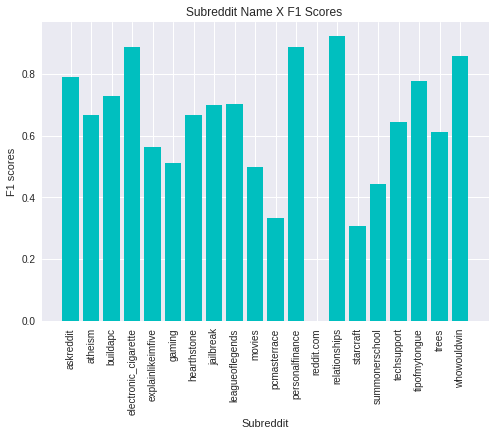

In [0]:
import numpy as np
import matplotlib.pyplot as plt
##get all features for one-hot logistic regression
from sklearn.metrics import f1_score

f1_scores=f1_score(test_labels, predicted_label_lr,average=None) 
subreddit_labels=np.unique(test_threads['subreddit'])


plt.bar(subreddit_labels, f1_scores, align='center', alpha=1,color='c')
plt.xticks(subreddit_labels,  rotation='vertical')
plt.ylabel('F1 scores')
plt.xlabel('Subreddit')
plt.title('Subreddit Name X F1 Scores ')
 
plt.show()

####Support Vector Machine

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score


classifier = SVC(gamma='auto',kernel='rbf')
nb_model = classifier.fit(train_features_onehot, train_labels)
predicted_label_lr = nb_model.predict(test_features_onehot)
#evaluation_summary("One-hot SVC",  predicted_label_lr, test_labels)


####Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5)
nb_model = classifier.fit(train_features_onehot, train_labels)
predicted_label_lr = nb_model.predict(test_features_onehot)
#evaluation_summary("One-hot DT",  predicted_label_lr, test_labels)

# print(train_features_onehot.shape, train_labels.shape)


####Dummy Classifiers


In [0]:
from sklearn.dummy import DummyClassifier


classifier1=DummyClassifier(strategy="stratified")
classifier2=DummyClassifier(strategy="most_frequent")
                            
Dummy_model1 = classifier1.fit(train_features_onehot, train_labels)
Dummy_model2 = classifier2.fit(train_features_onehot, train_labels)


predicted_label_dummy1 = Dummy_model1.predict(test_features_onehot)
predicted_label_dummy2 = Dummy_model2.predict(test_features_onehot)

            
# evaluation_summary(" Dummy Classifier with stratifed",  predicted_label_dummy1, test_labels)
# evaluation_summary("Dummy Classifier with most_frequent",  predicted_label_dummy2, test_labels)

###TF-IDF Features

In [0]:
#Tf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy import sparse


Tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize,binary=True)
train_features_tf_b =Tfidf_vectorizer.fit_transform(train_threads['body'])
test_features_tf_b = Tfidf_vectorizer.transform(test_threads['body'])


train_features_tf_a =Tfidf_vectorizer.fit_transform(train_threads['author'])
test_features_tf_a = Tfidf_vectorizer.transform(test_threads['author'])


train_features_tf_t =Tfidf_vectorizer.fit_transform(train_threads['title'])
test_features_tf_t = Tfidf_vectorizer.transform(test_threads['title'])


train_features_tfidf = sparse.hstack([train_features_tf_b,train_features_tf_a,train_features_tf_t])

test_features_tfidf = sparse.hstack([test_features_tf_b,test_features_tf_a, test_features_tf_t])


####Logistic Regression

In [0]:
#logistic
classifier = LogisticRegression()
nb_model = classifier.fit(train_features_tfidf, train_labels)
predicted_label_lr = nb_model.predict(test_features_tfidf)
#evaluation_summary_full("LR tfidf",  predicted_label_lr, test_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


####Support Vector Machines

In [0]:
from sklearn.svm import SVC



classifier = SVC(gamma='auto',kernel='rbf')
nb_model = classifier.fit(train_features_tfidf, train_labels)
predicted_label_lr = nb_model.predict(test_features_tfidf)
#evaluation_summary("FTIDF SVC",  predicted_label_lr, test_labels)

####Dummy Classifiers

In [0]:
from sklearn.dummy import DummyClassifier


classifier1=DummyClassifier(strategy="stratified")
classifier2=DummyClassifier(strategy="most_frequent")
                            
Dummy_model1 = classifier1.fit(train_features_tfidf, train_labels)
Dummy_model2 = classifier2.fit(train_features_tfidf, train_labels)


predicted_label_dummy1 = Dummy_model1.predict(test_features_tfidf)
predicted_label_dummy2 = Dummy_model2.predict(test_features_tfidf)

            
#evaluation_summary(" Dummy Classifier with stratifed",  predicted_label_dummy1, test_labels)
#evaluation_summary("Dummy Classifier with most_frequent",  predicted_label_dummy2, test_labels)

####Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
print(train_features_onehot.shape, train_labels.shape)

classifier = DecisionTreeClassifier(max_depth=5)
nb_model = classifier.fit(train_features_tfidf, train_labels)
predicted_label_lr = nb_model.predict(test_features_tfidf)
# evaluation_summary("tfidf DT",  predicted_label_lr, test_labels)

# print(train_features_onehot.shape, train_labels.shape)

(1456, 22012) (1456,)


##Tuning Hyperparameters

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [0]:
from sklearn.model_selection import GridSearchCV
from random import shuffle, choices
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

#features that did not improve the effectiveness were commented
pipeline =Pipeline([
    ('union', FeatureUnion([
        ('body', Pipeline([
           ('selector',ItemSelector('body')),
           ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,
                                     sublinear_tf=False,
                                    max_features=None,
                                     #stop_words='english',
                                     ngram_range=(1,1)
                                    )),
                                    
        ])),
        ('author', Pipeline([
           ('selector',ItemSelector('author')),
           ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,
                                    sublinear_tf=True,
                                    max_features=None,
                                    ngram_range=(1,1)
                                    )),
        
        ])),
        
         ('title', Pipeline([
           ('selector',ItemSelector('title')),
           ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,
                                     sublinear_tf=False,
                                      max_features=None,
                                     ngram_range=(1,1)
                                    )),
             
         ])),
        
        
#          ('length', Pipeline([
#            ('selector',ItemSelector('length')),
#            ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize)),
             
#          ])),
#         ('post_depth', Pipeline([
#            ('selector',ItemSelector('post_depth')),
#            ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,
#                                       #sublinear_tf=True,ngram_range=(1,1)
#                                    )),
             
#          ])),
#          ('post_depth', Pipeline([
#            ('selector',ItemSelector('post_depth')),
#            ('tfidf', TfidfVectorizer(
#                                       #sublinear_tf=True,ngram_range=(1,1)
#                                    )),
             
#          ])),
        
#          ('majority_type', Pipeline([
#            ('selector',ItemSelector('majority_type')),
#            ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize,
#                                       #sublinear_tf=True,ngram_range=(1,1)
#                                    )),
             
#          ])),
         
#           ('is_selected', Pipeline([
#                ('selector', ItemSelector(key='is_first_post')),
#                ('standard', TfidfVectorizer(
#                                       #sublinear_tf=True,ngram_range=(1,1)
#                                            )),
#                ])),
    ])),
    ('logit',LogisticRegression(solver='newton-cg',multi_class='ovr',C=100000.0)),
                                    
        
])
 
parameters= {
    #'union__body__tfidf__sublinear_tf':(True,False),
    #'union__title__tfidf__sublinear_tf':(True,False),
    #'union__author__tfidf__sublinear_tf':(True,False),
    #'union__body__tfidf__ngram_range':((1,1),(1,2),(1,3),(2,2)),
    #'union__title__tfidf__ngram_range':((1,1),(1,2),(1,3),(2,2)),
    #'union__author__tfidf__ngram_range':((1,1),(1,2),(1,3)),
    
    #'union__body__tfidf__max_features':(None,1000,1500,2500),
    #'union__title__tfidf__max_features':(None,1000,1500,2500),
    #'union__author__tfidf__max_features':(None,1000,1500,2500),
    
#     'logit__solver':('newton-cg','lbfgs', 'sag','saga'),
#     'logit__multi_class':('ovr','multinomial','auto'),
#     'logit__C':[10e-2,10, 10e1 , 10e2 , 10e3,10e4],    
    
    }

# grid_search = GridSearchCV(pipeline, param_grid=parameters, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
# print("Performing grid search...")
# print("pipeline:", [name for name, _ in pipeline.steps])
# print("parameters:")
# print(parameters)
# grid_search.fit(train_threads, train_labels)

# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#   print("\t%s: %r" % (param_name, best_parameters[param_name]))




In [0]:
#Confusion matrix
#source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation='vertical')
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    
    thresh =cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
classes=['askreddit','atheism','buildapc','electronic_cigarette','explainlikeimfive','gaming','hearthstone','jailbreak','leagueOfLegends','movies','pcmasterrace','personalfinance','reddit.com','relationships','starcraft','summonerschool','techsupport','tipofmytongue','trees','whowouldwin']



def evaluation_summary_grid(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average='macro')
  recall = recall_score(predictions, true_labels, average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1, average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))
  cm2=confusion_matrix(true_labels, predictions)
  plt.figure(figsize=(7,7))
  plot_confusion_matrix(cm2, classes,title='Confusion matrix, without normalization')
  plt.show()
 # print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions))

Evaluation for: After grid search
Classifier 'After grid search' has Acc=0.734 P=0.643 R=0.757 F1=0.665
                      precision    recall  f1-score   support

           askreddit      0.893     0.658     0.758       114
             atheism      0.833     1.000     0.909        10
            buildapc      0.892     0.825     0.857        40
electronic_cigarette      0.889     0.727     0.800        11
   explainlikeimfive      0.500     0.636     0.560        11
              gaming      0.647     0.524     0.579        21
         hearthstone      0.667     1.000     0.800        10
           jailbreak      0.818     1.000     0.900         9
     leagueoflegends      0.833     0.769     0.800        52
              movies      0.400     0.500     0.444         4
        pcmasterrace      0.304     0.636     0.412        11
     personalfinance      1.000     0.909     0.952        11
          reddit.com      0.000     0.000     0.000         1
       relationships      1

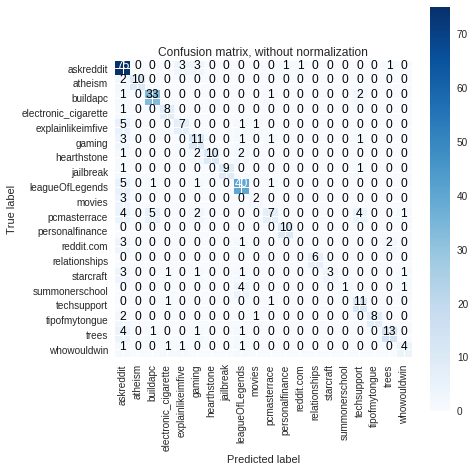

In [0]:
pipeline.fit(train_threads,train_labels)
prediction=pipeline.predict(test_threads)

evaluation_summary_grid("After grid search", prediction,test_labels)

###Error Analysis

In [0]:
def print_errors(labels, predictions, data):
  label_arr = labels.values
  for idx, prediction in enumerate(predictions): 
    label = label_arr[idx]
    if prediction != label:
      print(idx, label, prediction, data.iloc[idx]['body'])

In [0]:
#print_errors(test_labels, prediction, test_threads)

In [0]:
body = test_threads[np.logical_and(test_threads.subreddit == '', prediction == '')]
print(*body.body, sep='\n -----------\n')

## Part B: Discourse prediction ##

###Download train and test dataset:

---



In [0]:
discourse_train = "coursework_discourse_train.json"
discourse_test = "coursework_discourse_test.json"
  
!gsutil cp gs://textasdata/coursework/coursework_discourse_train.json $discourse_train  
!gsutil cp gs://textasdata/coursework/coursework_discourse_test.json  $discourse_test

Copying gs://textasdata/coursework/coursework_discourse_train.json...
- [1 files][ 60.2 MiB/ 60.2 MiB]                                                
Operation completed over 1 objects/60.2 MiB.                                     
Copying gs://textasdata/coursework/coursework_discourse_test.json...
- [1 files][ 15.1 MiB/ 15.1 MiB]                                                
Operation completed over 1 objects/15.1 MiB.                                     


### Parse JSON file 

In [0]:
# The reddit thread structure is nested with posts in a new content.
# This block reads the file as json and creates a new data frame.
import pandas as pd
import json

def load_posts(file):
  # A temporary variable to store the list of post content.
  posts_tmp = list()

  with open(file) as jsonfile:
    for i, line in enumerate(jsonfile):
     # if (i > 2): break
      thread = json.loads(line)
      for post in thread['posts']:
        # NOTE: This could be changed to use additional features from the post or thread.
        # DO NOT change the labels for the test set.
        posts_tmp.append((thread['subreddit'], thread['title'], thread['url'], thread['is_self_post'],
                        post['id'], post.get('author', ""), post.get('body', ""), post.get("majority_link", ""), 
                        post.get('post_depth', 0), post.get('majority_type', ""), # discourse type label 
                        post.get('in_reply_to', "") ))

# Create the posts data frame.  
  labels = ['subreddit', 'title', 'url','is_self_post', 'id', 'author', 'body', 'majority_link', 
          'post_depth', 'discourse_type', 'in_reply_to']
  return pd.DataFrame(posts_tmp, columns=labels)

### Filter empty labels

In [0]:
train_posts = load_posts(discourse_train)
# Filter out empty labels
train_posts = train_posts[train_posts['discourse_type'] != ""]
print(train_posts.head())
print("Num posts: ", train_posts.size)

    subreddit                           title  \
0  worldofpvp  Help me decide my new PvP main   
1  worldofpvp  Help me decide my new PvP main   
2  worldofpvp  Help me decide my new PvP main   
3  worldofpvp  Help me decide my new PvP main   
4  worldofpvp  Help me decide my new PvP main   

                                                 url  is_self_post  \
0  https://www.reddit.com/r/worldofpvp/comments/2...           1.0   
1  https://www.reddit.com/r/worldofpvp/comments/2...           1.0   
2  https://www.reddit.com/r/worldofpvp/comments/2...           1.0   
3  https://www.reddit.com/r/worldofpvp/comments/2...           1.0   
4  https://www.reddit.com/r/worldofpvp/comments/2...           1.0   

           id        author  \
0   t3_2v0anq      TyrickEU   
1  t1_codb2p9          vurt   
2  t1_codg0we   OptimusNice   
3  t1_coeatsq                 
4  t1_codbyit  Rageinjector   

                                                body majority_link  \
0  Hi. \nAs a raider previo

The label for the post we will be predicting is in the discourse_type column.

In [0]:
test_posts = load_posts(discourse_test)
# Filter out empty labels
test_posts = test_posts[test_posts['discourse_type'] != ""]
print("Num posts: ", test_posts.size)


Num posts:  217932


In [0]:
train_labels = train_posts['discourse_type']
test_labels = test_posts['discourse_type']

###Examine the distribution over labels on the training data.

In [0]:
discourse_counts = train_labels.value_counts()
print(discourse_counts.describe())

top_discourse = discourse_counts.nlargest(200)
print(top_discourse)
top_discourse = top_discourse.index.tolist()
print(top_discourse)

count       10.000000
mean      7926.700000
std       9664.321866
min       1266.000000
25%       1671.500000
50%       3235.500000
75%      11919.750000
max      31419.000000
Name: discourse_type, dtype: float64
answer              31419
elaboration         14775
question            13610
appreciation         6849
agreement            3868
disagreement         2603
humor                1787
other                1633
announcement         1457
negativereaction     1266
Name: discourse_type, dtype: int64
['answer', 'elaboration', 'question', 'appreciation', 'agreement', 'disagreement', 'humor', 'other', 'announcement', 'negativereaction']


##Adding Features

Four features are listed below, and the rest were implemented directly in the pipeline.


###1. Metadata: Is a post a link post or a self post

In [0]:
#function to create is_self column
def create_is_self_post(x):
    if x == 1.0:
        return 1 # 'positive' 
    return 0 # 'negative' for Nan values and empty values
  
train_posts['is_self'] = train_posts.is_self_post.apply(create_is_self_post)
test_posts['is_self']=test_posts.is_self_post.apply(create_is_self_post)


###2. Thread Features: the total number of comments in the discussion

In [0]:
import numpy as np
#create a column called comment
#get total number of comments for all the threads in the train_posts

urls=np.unique(train_posts['url'])
len(urls)

dict={}
for x in urls:
  
  dict[x]=len(train_posts[train_posts['url']==x])
  
train_posts['comment'] = train_posts['url'].apply(lambda x: dict.get(x))


In [0]:
# get total number of comments for the threads in the test_posts
urls=np.unique(test_posts['url'])
len(urls)
for x in urls:
   dict[x]=len(test_posts[test_posts['url']==x])

test_posts['comment'] = test_posts['url'].apply(lambda x: dict.get(x))


###3. Author: A binary feature for whether the current author is also the author of the initial post

In [0]:
import numpy as np

train_posts['binary_author']=np.where(np.logical_or(train_posts['author']==train_posts['in_reply_to'] , train_posts['in_reply_to']=='') ,1,0)
test_posts['binary_author']=np.where(np.logical_or(test_posts['author']==test_posts['in_reply_to'] , test_posts['in_reply_to']=='') ,1,0)


###4. Structure: the number of words in a post 

In [0]:
train_posts['length'] = train_posts['body'].apply(lambda x: len(str(x).split(" ")))
test_posts['length'] = test_posts['body'].apply(lambda x: len(str(x).split(" ")))

In [0]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 25.8MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


###Statistics

0.7.1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


,is_self_post,post_depth,is_self,comment,binary_author,length
discourse_type,,,,,,
agreement,1.0,2.623320,0.941313,19.277921,0.000000,31.786711
announcement,1.0,0.000000,0.761839,11.168154,1.000000,96.329444
answer,1.0,1.512142,0.977689,16.837137,0.000000,47.820841
appreciation,1.0,2.338736,0.911228,16.262374,0.000000,19.497591
disagreement,1.0,3.046869,0.933538,19.160584,0.000000,47.857088
elaboration,1.0,2.761827,0.921624,18.829915,0.000000,42.235059
humor,1.0,2.349189,0.855624,18.893117,0.022384,11.485171
negativereaction,1.0,2.202212,0.853870,17.184834,0.000000,18.309637
other,1.0,2.099204,0.917330,17.350888,0.054501,19.243723


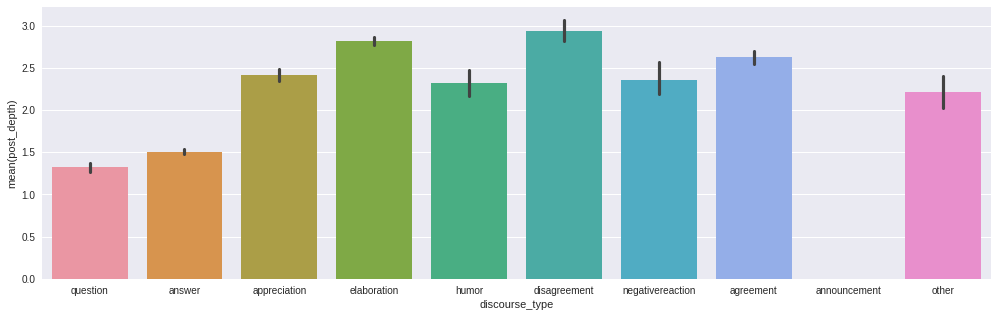

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy import sparse

print(sns.__version__)
sns.set(color_codes=True)

a4_dims = (17, 5)

fig, ax = plt.subplots(figsize=a4_dims)

# ax = sns.boxplot( ax=ax, x=test_posts['discourse_type'],y=test_posts['comment'],linewidth=2.5)
ax = sns.barplot( ax=ax, x=test_posts['discourse_type'],y=test_posts['post_depth'],linewidth=2.5)

train_posts.binary_author.count()
train_posts.groupby('discourse_type').mean()


#sns.distplot(x);

## Feature Pipeline:


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [0]:
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

###Spacy Tokenizer

In [0]:
from spacy.tokenizer import Tokenizer

import spacy

import sys
print(sys.version)

# Version checks
import importlib
def version_check(libname, min_version):
    m = importlib.import_module(libname)
    print ("%s version %s is" % (libname, m.__version__))
    print ("OK" if m.__version__ >= min_version 
           else "out-of-date. Please upgrade!")
    
version_check("spacy", "2.0")
# Load the small english model. 
# Disable the advanced NLP features in the pipeline for efficiency.
nlp = spacy.load('en_core_web_sm', disable=['ner'])
print(nlp.pipeline)
print(nlp.pipe_names)
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
# Verify they are empty.
print(nlp.pipeline)

#mine
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))

def normalize(tokens):
  normalized = list()
  for token in tokens:
    if (token.is_alpha or token.is_digit):
      lemma = token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_
      normalized.append(lemma)
  return normalized

#@title
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
spacy version 2.0.18 is
OK
[('tagger', <spacy.pipeline.Tagger object at 0x7f3f1bd7ccc0>), ('parser', <spacy.pipeline.DependencyParser object at 0x7f3f1bd5c9e8>)]
['tagger', 'parser']
[]


###5. Content + Punctuation: Words Unigram, Bigrams, and Trigrams ?? Character n-grams (n=1,2,3,4)

###6. Community: The subreddit the post came from

###7. Structure: Depth: the depth of the comment raw

In [0]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
#useless features were commented


prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf-hot', TfidfVectorizer(tokenizer=tokenize_normalize, 
                                         ngram_range=(1,2),
                                         lowercase=True)), 
              ])),
#             ('title', Pipeline([
#               ('selector', ItemSelector(key='title')),
#               ('tf-hot', TfidfVectorizer(tokenizer=tokenize_normalize, 
#                                          ngram_range=(1,2),
#                                          lowercase=True)), 
#               ])),
              
            ('subreddit', Pipeline([
              ('selector', ItemSelector(key='subreddit')),
              ('tf-hot', TfidfVectorizer(tokenizer=tokenize_normalize,
                                         lowercase=True)), 
              ])),
              
#                ('author', Pipeline([
#               ('selector', ItemSelector(key='author')),
#               ('tf-hot', TfidfVectorizer(tokenizer=tokenize_normalize,
#                                          lowercase=True)), 
#               ])),
              
            ('length', Pipeline([
              ('selector', NumberSelector(key='length')),
              ('standard', KBinsDiscretizer(n_bins=5, encode='onehot')), 
              ])),
              
            
            ('same_author', Pipeline([
               ('selector', NumberSelector(key='binary_author')),
               ('standard', StandardScaler()), 
               ])),
             ('depth', Pipeline([
               ('selector', NumberSelector(key='post_depth')),
               ('standard', StandardScaler()), 
               ])),
              
#              ('comments', Pipeline([
#                ('selector', NumberSelector(key='comment')),
#                ('standard', StandardScaler()), 
#                ])),
              
            
             ('is_selected', Pipeline([
               ('selector', NumberSelector(key='is_self')),
               ('standard', StandardScaler()), 
               ])),
              
        ])),
         
    #comment this line
         ##('logit',LogisticRegression(solver='saga',multi_class='multinomial')),
      
       
    ])

print(prediction_pipeline.get_params().keys())



dict_keys(['memory', 'steps', 'union', 'union__n_jobs', 'union__transformer_list', 'union__transformer_weights', 'union__body', 'union__subreddit', 'union__length', 'union__same_author', 'union__depth', 'union__is_selected', 'union__body__memory', 'union__body__steps', 'union__body__selector', 'union__body__tf-hot', 'union__body__selector__key', 'union__body__tf-hot__analyzer', 'union__body__tf-hot__binary', 'union__body__tf-hot__decode_error', 'union__body__tf-hot__dtype', 'union__body__tf-hot__encoding', 'union__body__tf-hot__input', 'union__body__tf-hot__lowercase', 'union__body__tf-hot__max_df', 'union__body__tf-hot__max_features', 'union__body__tf-hot__min_df', 'union__body__tf-hot__ngram_range', 'union__body__tf-hot__norm', 'union__body__tf-hot__preprocessor', 'union__body__tf-hot__smooth_idf', 'union__body__tf-hot__stop_words', 'union__body__tf-hot__strip_accents', 'union__body__tf-hot__sublinear_tf', 'union__body__tf-hot__token_pattern', 'union__body__tf-hot__tokenizer', 'union

###Fit the feature pipeline of the train and test data

In [0]:

X_train = prediction_pipeline.fit_transform(train_posts)
X_test = prediction_pipeline.transform(test_posts)



# prediction_pipeline.get_params().keys()

# from sklearn.model_selection import GridSearchCV
# from random import shuffle, choices
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import FeatureUnion
# parameters= {
#     'union__body__tf-hot__sublinear_tf':(True,False),
#     'union__title__tf-hot__sublinear_tf':(True,False),
# #     'union__subreddit__tf-hot__sublinear_tf':(True,False),
# #     'union__body__tf-hot__ngram_range':((1,1),(1,2)),
# #     'union__title__tf-hot__ngram_range':((1,1),(1,2)),
#     #'union__subreddit__tf-hot__ngram_range':((1,1),(1,2),(1,3)),
#     #'union__body__tf-hot__max_features':(2500,7500,5000),
#     #'union__title__tf-hot__max_features':(None,3000,15000),
#     #'union__subreddit__tf-hot__max_features':(None,3000,15000),
    
#     'logit__solver':('newton-cg','lbfgs', 'sag'),
#     'logit__multi_class':('ovr','multinomial','auto'),
#     'logit__C':[10e-2,10, 10e1 , 10e2 , 10e3,10e4],    
    
#     }
# #, scoring='f1_macro'
# grid_search = GridSearchCV(prediction_pipeline, param_grid=parameters, n_jobs=1, verbose=1, cv=2)
# print("Performing grid search...")
# print("pipeline:", [name for name, _ in prediction_pipeline.steps])
# print("parameters:")
# print(parameters)
# grid_search.fit(train_posts, train_labels)

# print("Best score: %0.3f" % grid_search.best_score_)
# print("Best parameters set:")
# best_parameters = grid_search.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#   print("\t%s: %r" % (param_name, best_parameters[param_name]))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

In [0]:
prediction_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'union', 'union__n_jobs', 'union__transformer_list', 'union__transformer_weights', 'union__body', 'union__subreddit', 'union__length', 'union__same_author', 'union__depth', 'union__is_selected', 'union__body__memory', 'union__body__steps', 'union__body__selector', 'union__body__tf-hot', 'union__body__selector__key', 'union__body__tf-hot__analyzer', 'union__body__tf-hot__binary', 'union__body__tf-hot__decode_error', 'union__body__tf-hot__dtype', 'union__body__tf-hot__encoding', 'union__body__tf-hot__input', 'union__body__tf-hot__lowercase', 'union__body__tf-hot__max_df', 'union__body__tf-hot__max_features', 'union__body__tf-hot__min_df', 'union__body__tf-hot__ngram_range', 'union__body__tf-hot__norm', 'union__body__tf-hot__preprocessor', 'union__body__tf-hot__smooth_idf', 'union__body__tf-hot__stop_words', 'union__body__tf-hot__strip_accents', 'union__body__tf-hot__sublinear_tf', 'union__body__tf-hot__token_pattern', 'union__body__tf-hot__tokenizer', 'union

##The logistic regression Model

In [0]:
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(solver='newton-cg',multi_class='multinomial')
# lr=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='multinomial',
#           n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
#           tol=0.0001, verbose=0, warm_start=False)
lr=LogisticRegression(multi_class='multinomial',solver='saga')
lr.fit(X_train, train_labels)
predictions = lr.predict(X_test)  


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
# print(lr.coef_)
# from sklearn.feature_selection import RFE
# rfe = RFE(lr, 8)
# rfe = rfe.fit(X_train, train_labels)
# print('Selected features: %s' % list(lr.columns[rfe.support_]))


####Top 20 Features

In [0]:
!pip install eli5
import eli5
eli5.show_weights(lr, vec=prediction_pipeline, top=20)

####Error Analysis

In [0]:
def print_errors(labels, predictions, data):
  label_arr = labels.values
  for idx, prediction in enumerate(predictions): 
    label = label_arr[idx]
    if prediction != label:
      print(idx, label, prediction, data.iloc[idx]['body'])

In [0]:
#print_errors(test_labels, predictions, test_posts)

###Feature Graph

####ELI5 analysis - vectorizer at a time

In [0]:
# from sklearn.pipeline import FeatureUnion
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import StandardScaler

# from sklearn.pipeline import make_pipeline


# ##body=make_pipeline(ItemSelector(key='body'), TfidfVectorizer(tokenizer=tokenize_normalize,ngram_range=(1,2), lowercase=True))

# ##title=make_pipeline(ItemSelector(key='title'),TfidfVectorizer(tokenizer=tokenize_normalize,ngram_range=(1,2), lowercase=True))
# vectorizer=TfidfVectorizer(tokenizer=tokenize_normalize,ngram_range=(1,2), lowercase=True)
# body=vectorizer.fit_transform(train_posts['body'])
# title=vectorizer.fit_transform(train_posts['title'])
# lr1=LogisticRegression(solver='sag',multi_class='multinomial',C=10e4)
# ###body, title, subreddit, length, binary_author ,post_depth, comment, is_self
# pipe=make_pipeline(vectorizer,lr1)



In [0]:
# X_train=pipe.fit(train_posts['body'],train_labels)
# X_test = pipe.predict(test_posts['body'])
# pipe.score(train_posts['body'], train_labels)
# target=np.unique(test_labels)
# print(target)
# eli5.show_weights(lr1, vec=vectorizer ,target_names=target)

In [0]:
evaluation_summary("hello",predictions,test_labels)

Evaluation for: hello
Classifier 'hello' has Acc=0.612 P=0.337 R=0.515 F1=0.368
                  precision    recall  f1-score   support

       agreement      0.199     0.569     0.295       332
    announcement      0.427     0.722     0.537       216
          answer      0.865     0.615     0.719     11168
    appreciation      0.610     0.745     0.671      1410
    disagreement      0.050     0.317     0.086       101
     elaboration      0.397     0.416     0.406      3467
           humor      0.044     0.290     0.076        69
negativereaction      0.049     0.441     0.088        34
           other      0.043     0.242     0.072        66
        question      0.681     0.791     0.732      2949

       micro avg      0.612     0.612     0.612     19812
       macro avg      0.337     0.515     0.368     19812
    weighted avg      0.711     0.612     0.645     19812


Confusion matrix:
 [[ 189    0  439   51    4  240    2    4    4   18]
 [   0  156    0    0    0    0 

In [0]:
#for displaying statistics per class label
def evaluation_summary1(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels,average=None)
  recall = recall_score(predictions, true_labels,average=None)
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1,average=None) #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.


###Evaluate the model

####F1 Score for each Class

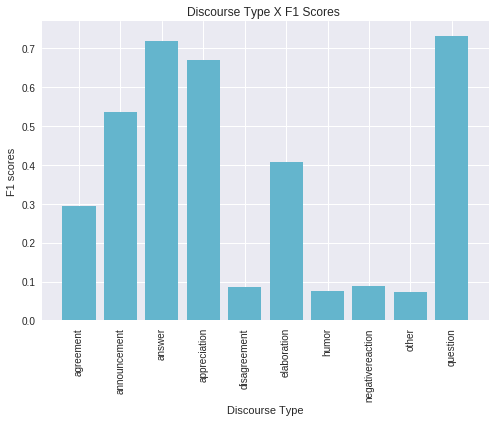

In [0]:
##get all features for one-hot logistic regression
from sklearn.metrics import f1_score

f1_scores=f1_score(test_labels, predictions,average=None) 
discourse_labels=np.unique(test_labels)


plt.bar(discourse_labels, f1_scores, align='center', alpha=1,color='c')
plt.xticks(discourse_labels,  rotation='vertical')
plt.ylabel('F1 scores')
plt.xlabel('Discourse Type')
plt.title('Discourse Type X F1 Scores ')
 
plt.show()

In [0]:
#this is the evaluation summary matrix do not edit this
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels,average='macro')
  recall = recall_score(predictions, true_labels,average='macro')
  accuracy = accuracy_score(predictions, true_labels)
  f1 = fbeta_score(predictions, true_labels, 1,average='macro') #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1=%0.3f" % (description,accuracy,precision,recall,f1))
  print(classification_report(predictions, true_labels, digits=3))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted, odd.

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

Evaluation for: multi_class='multinomial',solver='saga'
Classifier 'multi_class='multinomial',solver='saga'' has Acc=0.612 P=0.337 R=0.515 F1=0.368
                  precision    recall  f1-score   support

       agreement      0.199     0.569     0.295       332
    announcement      0.427     0.722     0.537       216
          answer      0.865     0.615     0.719     11168
    appreciation      0.610     0.745     0.671      1410
    disagreement      0.050     0.317     0.086       101
     elaboration      0.397     0.416     0.406      3467
           humor      0.044     0.290     0.076        69
negativereaction      0.049     0.441     0.088        34
           other      0.043     0.242     0.072        66
        question      0.681     0.791     0.732      2949

       micro avg      0.612     0.612     0.612     19812
       macro avg      0.337     0.515     0.368     19812
    weighted avg      0.711     0.612     0.645     19812


Confusion matrix:
 [[ 189    0  439 

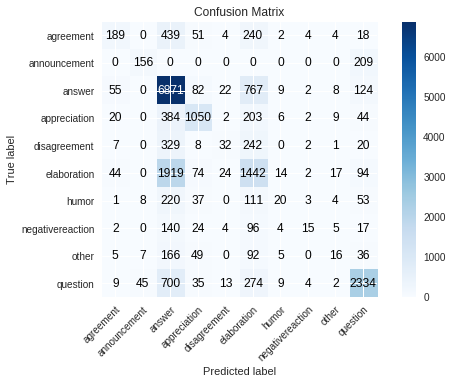

In [0]:
desc="multi_class='multinomial',solver='saga'"
evaluation_summary(desc,  predictions, test_labels)
plot_confusion_matrix(test_labels, predictions, classes=discourse_labels, normalize=False,title='Confusion Matrix')


#has Acc=0.613 P=0.337 R=0.515 F1=0.368

###Dummy Classifier

In [0]:
# Define the features 
#do not edit you did not write this
#X_train = #features from training data
#X_test = #features from test data
#the dummy classifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(X_train, train_posts['discourse_type'])
predictions = clf.predict(X_test)  
#print(classification_report(predictions, test_posts['discourse_type']))

In [0]:
desc="Dummy Classifier"
evaluation_summary(desc,  predictions, test_labels)
#has Acc=0.233

Evaluation for: Dummy Classifier
Classifier 'Dummy Classifier' has Acc=0.233 P=0.101 R=0.101 F1=0.101
                  precision    recall  f1-score   support

       agreement      0.055     0.056     0.055       934
    announcement      0.022     0.021     0.021       382
          answer      0.393     0.395     0.394      7910
    appreciation      0.079     0.085     0.082      1603
    disagreement      0.037     0.035     0.036       686
     elaboration      0.187     0.183     0.185      3711
           humor      0.024     0.024     0.024       449
negativereaction      0.026     0.027     0.026       297
           other      0.021     0.020     0.021       395
        question      0.167     0.166     0.167      3445

       micro avg      0.233     0.233     0.233     19812
       macro avg      0.101     0.101     0.101     19812
    weighted avg      0.233     0.233     0.233     19812


Confusion matrix:
 [[  52   20  379   66   38  165   28   19   14  170]
 [  22    

##Plot Confusion Matrix Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()